# seaborn + matplotlib을 이용한 jointplot 보완

- seaborn을 matplotlib과 섞어쓰는 방법이다.
- 4부 중 두 번째 시간이다.
- seaborn jointplot의 단점을 보완한다.

## 2.1. seaborn jointplot

**seaborn jointplot**

- seaborn의 jointplot은 매력적인 기능이다.
  - 두 변수 **각각의 분포**와 **2차원 분포**를 함께 보여준다.
  - 각각의 분포는 histogram과 kdeplot으로 표현할 수 있다.
  - 2차원 분포는 scatterplot, regression, kdeplot, hexbin등으로 표현할 수 있다.

- 만약 matplotlib에서 일일이 만들어야 한다면 한숨만 나올 것이다.
- seaborn에서는 단 한 줄로 이런 그림들이 탄생한다.

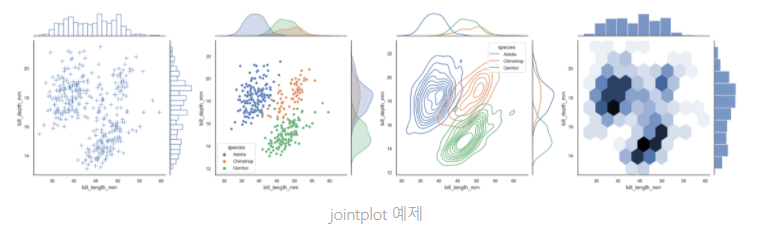

그림1

## 2.2. multiple jointplot

- 그러나 seaborn 만으로는 여러 jointplot이 합쳐진 그림을 표현할 수 없다.
- y축을 공유시키는 것 만으로도 훨씬 기능이 강력해질 것이다.

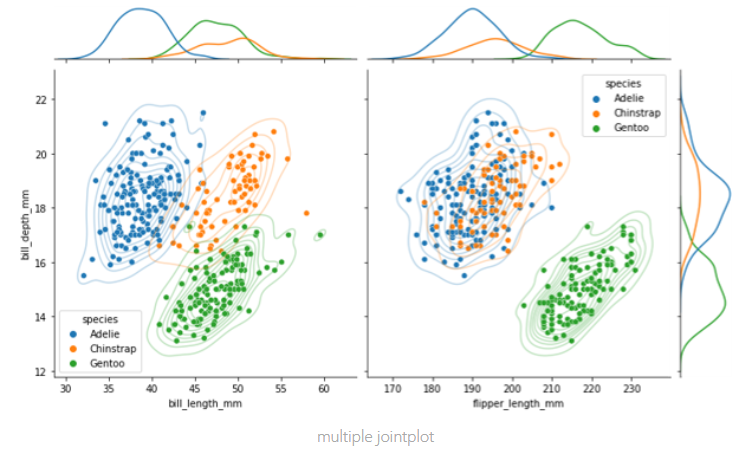

그림2

- 현실적으로 가장 빠른 방법은 파워포인트를 사용하는 것이다.
- 같은 y축 범위로 그림을 여러 개 그린 후 붙이면 된다.

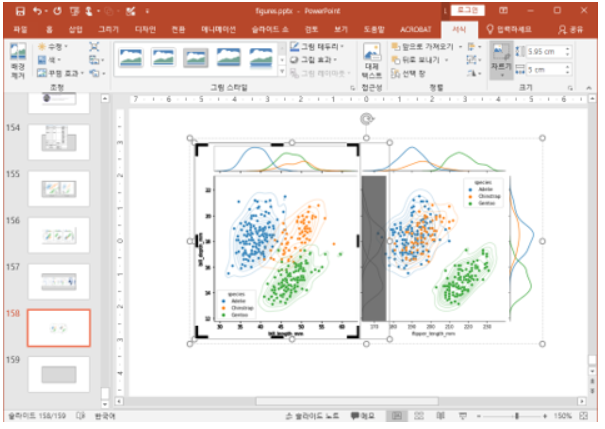

그림3

- 그러나 수작업이 동반되고, 오류 가능성이 커진다.
- seaborn과 matplotlib의 힘을 합해서 그려보자.

## 2.3. matplotlib + seaborn

- 지난 글에서 **seaborn과 matplotlib이 같이 사용되는 것**을 보았다.
- **matplotlib으로 틀을 만들고 여기에 seaborn을 삽입**한다.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")  # 펭귄 데이터셋으로 시작합니다.
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


- 가로축에 두 개의 데이터 : ```bill_length_mm```, ```flipper_length_mm``` 놓는다.
- 세로축에 한 개의 데이터 : ```bill_depth_mm```를 놓는다.

### 2.3.1. 축공간 배열 : gridspec

**matplotlib.pyplot.subplots**<br>
**matplotlib.gridspec.GridSpec**

- matplotlib을 객체지향 방식으로 사용할 때 이렇게 한다.
 - ```fig, ax = plt.subplots()``` 명령으로 ```figure```와 ```axes```를 만드는데 가로, 세로 여러 axes를 만들 때는 ```ncols```, ```nrows``` 인자를 사용한다.
 - 그러나 이렇게 하면 **모든 축공간의 크기가 같아진다.**
- ```jointplot```은 축공간의 크기가 일정하지 않다.
- ```gridspec```을 이용해서 비대칭 축공간을 만든다.

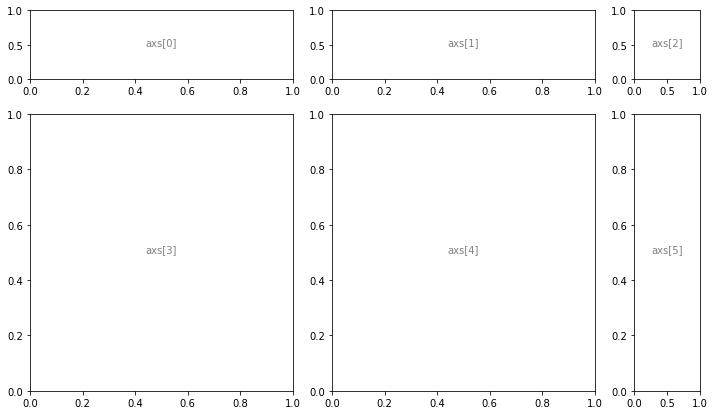

In [28]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1] # 행 축의 크기 지정 →
heights = [1, 4] # 열 축의 크기 지정 ↓

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights) 
# 설정된 fig의 값을 설정 해주는 역활, ncols=3 행의 값으로 widths의 값과 동일해야 하고, nrows=2 열의 값으로 lights의 값과 같아야 함, width_ratios=widths와 height_ratios=heights 설정해야 지정한 크기로 변경된다.

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)): # for 변수 in range(생성할 변수) 참고: http://asq.kr/Vfe3N5Hka7mIT
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)]) # subplot은 하나의 figure에 마치 표처럼 여러 axes를 표현할 수 있게 해 준다. 뒤는 모르겠다.
    axs[i].text(0.5, 0.5, f"axs[{i}]", fontdict={"horizontalalignment":"center", "color":"gray"}) # 표 안의 내용을 설정

- 축공간은 원래 2차원 배열이다. ```*2차원 배열: 가로세로가(행열) 있는 데이터```
- 하지만 이를 별로 좋아하지 않아서, ```dictionary```를 사용해 1차원으로 취급한다.

### 2.3.2. 첫 번째 jointplot : scatterplot + kdeplot

**seaborn.scatterplot**<br>
**seaborn.kdeplot**<br>
```scatterplot: 산점도를 표현, kdeplot: 커널 밀도를 추정 참조: http://asq.kr/R0NGGOVDALJTF```

- 좌측 하단에 첫 번째 2차원 분포도를 그린다.
- x축 변수는 ```bill_length_nm```, y축 변수는 ```bill_depth_mm```로 지정한다.
- seaborn 명령의 ```ax=``` 인자를 사용해 축공간을 지정한다.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


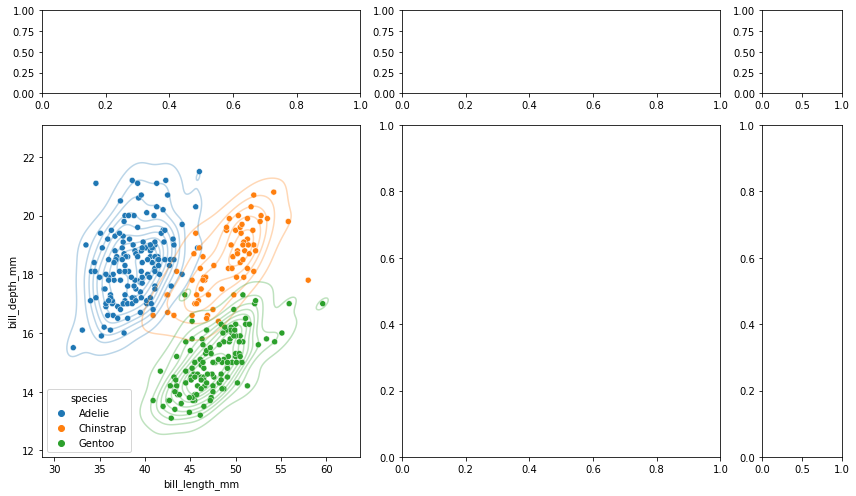

In [33]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

# 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

# 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

# 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3]) # 커널 밀도를 표현
# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3]) # 산점도 값을 표현

fig.tight_layout()

### 2.3.3. 첫 번째 jointplot : 1차원 kdeplot

- 첫 번째 jointplot의 상단과 우측에 1차원 분포도를 그린다.
 - 두 가지를 주의해야 한다.
  1. 중심이 되는 jointplot과 **가로세로 범위를 일치**시켜야 한다.
  2. 1차원 분포도의 **눈금과 수치는 필요없으니 제거**한다.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


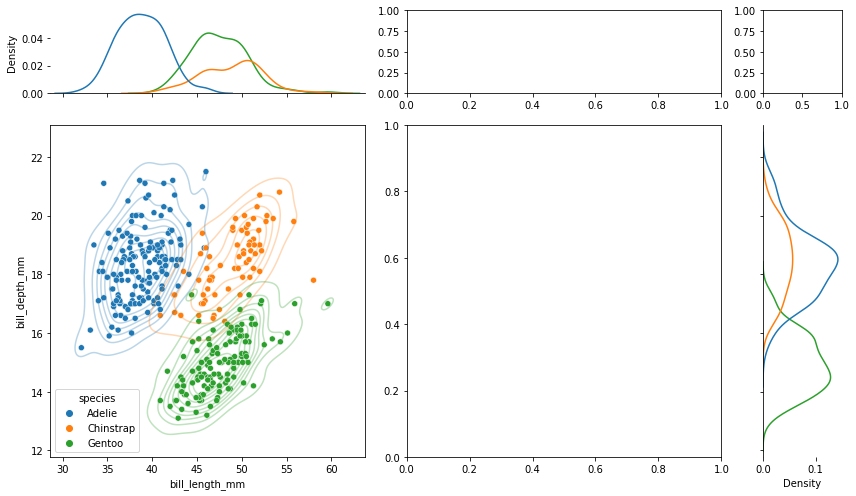

In [50]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3])

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3])

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False) # 0 그래프 설정 값, legend=False는 범주도표를 숨김
axs[0].set_xlim(axs[3].get_xlim()) # set_xlim 축 제한 설정
axs[0].set_xlabel('') # x축 이름 설정
axs[0].set_xticklabels([]) # set_xticklabels은 tick에 표시되는 내용을 바꿈 ex)0.0, 0.2, 0.4로 표시한 내용
axs[0].spines["left"].set_visible(False) # 그래프의 왼쪽 바 제거
axs[0].spines["top"].set_visible(False) # 그래프의 위쪽 바 제거
axs[0].spines["right"].set_visible(False) # 그래프의 오른쪽 바 제거 

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

fig.tight_layout()

### 2.3.4. 두 번째 jointplot

- 같은 요령으로 두 번째 분포도 만들어 준다.
- 첫 번째 jointplot에서 x 변수만 바꿔주면 된다.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seab

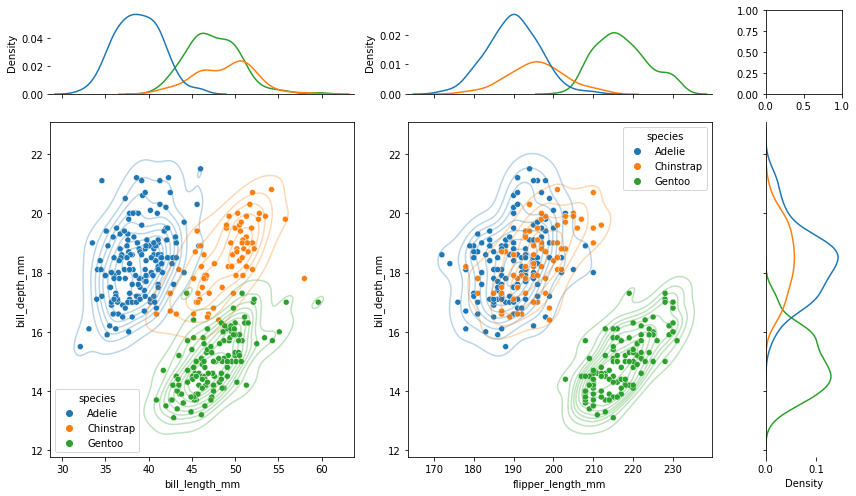

In [51]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3])

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3])

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4])

# 3.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4])

# 3.3. histogram (bill_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

fig.tight_layout()

### 2.3.5. 부대효과 조정 : spines, grids, 간격

- 데이터는 모두 올라갔으니 부대 효과를 조정한다.
- 불필요한 요소(ex. ```spines```)는 제거하고, 애매한 요소(ex. 위치)는 ```grid```로 명확히 합니다.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seab

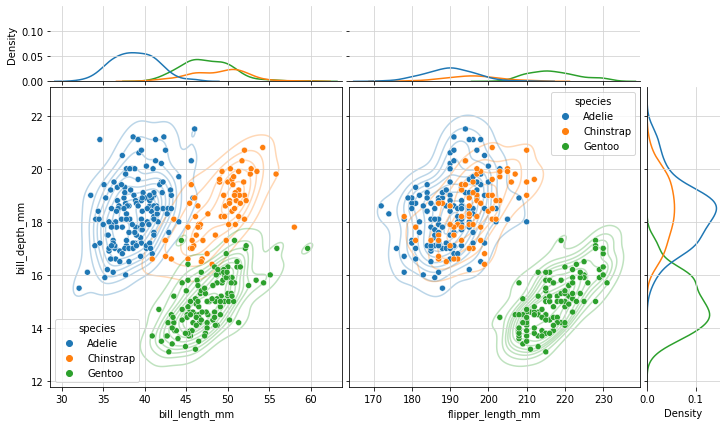

In [84]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights, 
                        wspace=0.03, hspace=0.03)  # setting spaces

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3], zorder=1) # , zorder=1은 레이어의 위치를 나타냄

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3], zorder=2)

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False, zorder=1)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False, zorder=1)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 4.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4], zorder=1)

# 4.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4], zorder=2)

# 4.3. histogram (flipper_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False, zorder=1)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

### 5. unnecessary elements removal
# 5.1. upper-right axes
axs[2].axis("off") # 그래프를 표시하지 않음

# 5.2. margin kdeplot scale unification
hist_range_max = max(axs[0].get_ylim()[-1], axs[1].get_ylim()[-1], axs[5].get_xlim()[-1]) # x, y 축의 0,1,5,의 그래프의 최대값을 변경
for i in range(len(widths)-1):
    axs[i].set_ylim(0, hist_range_max)
axs[5].set_xlim(0, hist_range_max)

# 5.3. redundent labels and titles removal
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[4].set_yticklabels([]) # y축의 표시값을 제거
axs[4].set_ylabel('')

# 5.4. grids
for i in range(len(heights)*len(widths)): # 그래프 배경을 설정
    axs[i].grid("on", color="lightgray", zorder=0) # axs[i]는 모든 그래프를 지정, 특정 곳에만 지정할 시에는 그래프 위치를 지정ex) axs[0] 0 위치한 그래프만 변경

fig.tight_layout()

- 1차원 분포의 스케일도 맞첬다.
 - 그러나 꼭 필요한 작업인지는 의구심이 든다.
 - **‘밀도’**라는 정의에 맞게 넓이를 1로 만드는 과정이 포함되어 있는데, 이로 인해 **x축 스케일이 크면 높이가 낮아지는 경향**이 있기 때문이다.
 - 데이터의 범위에 집중하고 싶다면 스케일을 맞추지 않는 것이 나을지도 모른다.

### 2.3.6. 마무리 작업

**seaborn tutorial: controlling figure aesthetics**

- 데이터를 표현하는 작업은 사실상 완료되었다.
- 폰트의 크기, 색상 등 가독성을 높인다.
- 이 때도 seaborn의 ```set_style()```과 ```set_context()```를 사용하면 편리하다.




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seab

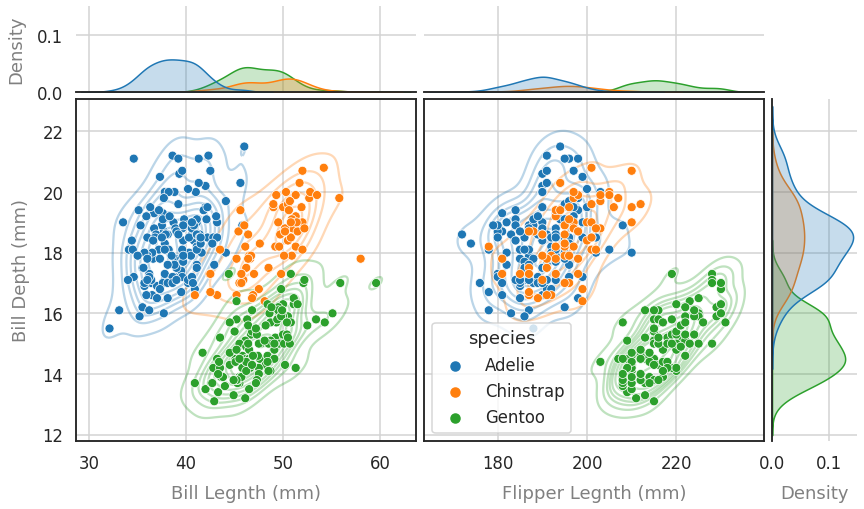

In [97]:
sns.set_style("white") # 그림의 전반적인 모형을 스케일링 해줌
sns.set_context("talk") # 다양한 매체에 활용할 수 있도록 스타일링 해줌 
# 참조: http://asq.kr/6hgSjTdRKXTPB
fig = plt.figure(figsize=(14,8))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights, 
                        wspace=0.03, hspace=0.03)  # setting spaces

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3], zorder=1, legend=False)

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3], zorder=2, legend=False)

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False, zorder=1, fill=True) # fill= True는 외각의 선그래프의 안을 채워 준다
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False, zorder=1, fill=True)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 4.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4], zorder=1)

# 4.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4], zorder=2)

# 4.3. histogram (flipper_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False, zorder=1, fill=True)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

### 5. unnecessary elements removal
# 5.1. upper-right axes
axs[2].axis("off")

# 5.2. margin kdeplot scale unification
hist_range_max = max(axs[0].get_ylim()[-1], axs[1].get_ylim()[-1], axs[5].get_xlim()[-1])
for i in range(len(widths)-1):
    axs[i].set_ylim(0, hist_range_max)
axs[5].set_xlim(0, hist_range_max)

# 5.3. redundent labels and titles removal
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[4].set_yticklabels([])
axs[4].set_ylabel('')

# 5.4. grids
for i in range(len(heights)*len(widths)):
    axs[i].grid("on", color="lightgray", zorder=0)
    
# 5.5. labels
font_label = {"color":"gray"} # 그래프의 라벨을 지정해 준다.
axs[3].set_xlabel("Bill Legnth (mm)", fontdict=font_label, labelpad=12)
axs[3].set_ylabel("Bill Depth (mm)", fontdict=font_label, labelpad=12)
axs[4].set_xlabel("Flipper Legnth (mm)", fontdict=font_label, labelpad=12)
axs[0].set_ylabel("Density", fontdict=font_label, labelpad=12)
axs[5].set_xlabel("Density", fontdict=font_label, labelpad=12)


fig.tight_layout()

- ```jointplot```의 한계인 **2중 jointplot이 구현되었다.**

### 2.3.7. generalize : 함수로 만들기

- 하는 김에, 기능을 일반화한다.
- 다중 jointplot 제작 기능을 함수로 만들고, x 변수의 수와 그림 크기, 1차원 분포 스케일 통일 등을 인자로 만든다.

In [100]:
def jointplots(xs, y, data, hue=None, height=6, ratio=5, space=0.2, xlabels=None, ylabel=None, margin_norm=False):
    """
    -------------------
    Input Parameters
    -------------------
    xs      : (list or str) feature name(s) of data
    y       : (str) feature name of data
    data    : (pandas.DataFrame)
    hue     : (str) semantic variable that is mapped to determine the color of plot elements. Semantic variable that is mapped to determine the color of plot elements.
    
    height  : (float) size of the figure
    ratio   : (float) ratio of the joint axes height to marginal axes height.
    space   : (float) space between the joint and marginal axes
    
    xlabels : (list or str) xlabels
    ylabel  : (str) ylabel
    margin_norm : (boolean) if True, kdeplots at marginal axes have same scale.
    """
    ### 1. input check
    # input type
    assert isinstance(xs, list) or isinstance(xs, str)
    if isinstance(xs, list):
        assert all([isinstance(x, str) for x in xs])
    else:
        xs = [xs]
        
    
    if xlabels != None:
        assert isinstance(xlabels, list) or isinstance(xlabels, str)
        if isinstance(xlabels, list):
            assert all([isinstance(xlabel, str) for xlabel in xlabels])
        else:
            xlabels = [xlabels]
    
    if ylabel != None:
        assert isinstance(ylabel, str)
    
    if hue != None:
        assert isinstance(hue, str)
    
    # input data
    assert all([x in data.columns for x in xs])
    assert y in data.columns
    if hue != None:
        assert hue in data.columns
    
    
    ### 2. figure
    h_margin = height / (ratio + 1)
    h_joint = height - h_margin
    
    if isinstance(xs, list):
        n_x = len(xs)
    else:
        n_x = 1
    
    widths = [h_joint] * n_x + [h_margin]
    heights = [h_margin, h_joint]
    ncols = len(widths)
    nrows = len(heights)
    
    fig = plt.figure(figsize=(sum(widths), sum(heights)))
    
    ### 3. gridspec preparation
    spec = fig.add_gridspec(ncols=ncols, nrows=nrows, 
                            width_ratios = widths, height_ratios = heights,
                            wspace=space, hspace=space
                           )
    
    ### 4. setting axes
    axs = {}
    for i in range(ncols * nrows):
        axs[i] = fig.add_subplot(spec[i//ncols, i%ncols])
    
    
    ### 5. jointplots (scatterplot + kdeplot)
    for i, x in enumerate(xs, ncols):
        if i == ncols:
            legend=True
        else:
            legend=False
        sns.kdeplot(x=x, y=y, data=data, hue=hue, alpha=0.3, ax=axs[i], zorder=2, legend=False)
        sns.scatterplot(x=x, y=y, data=data, hue=hue, alpha=0.8, ax=axs[i], zorder=3, legend=legend)
    
    
    ### 6. kdeplots at marginal axes
    axs[ncols-1].axis("off")
    
    axes_mx = list(range(ncols-1))
    axes_my = 2*ncols - 1
    
    for i, x in zip(axes_mx, xs):
        sns.kdeplot(x=x, data=data, hue=hue, fill=True, ax=axs[i], zorder=2, legend=False)
        axs[i].set_xlim(axs[i+ncols].get_xlim())
        axs[i].set_xlabel("")
        axs[i].set_xticklabels([])
        axs[i].spines["left"].set_visible(False)
        axs[i].spines["top"].set_visible(False)
        axs[i].spines["right"].set_visible(False)
    
    sns.kdeplot(y=y, data=data, hue=hue, fill=True, ax=axs[axes_my], zorder=2, legend=False)
    axs[axes_my].set_ylim(axs[ncols].get_ylim())
    axs[axes_my].set_ylabel("")
    axs[axes_my].set_yticklabels([])
    axs[axes_my].spines["bottom"].set_visible(False)
    axs[axes_my].spines["top"].set_visible(False)
    axs[axes_my].spines["right"].set_visible(False)
    
    if margin_norm == True:
        hist_range_max = max([axs[m].get_ylim()[-1] for m in axes_mx] + [axs[axes_my].get_xlim()[-1]])
        for i in axes_mx:
            axs[i].set_ylim(0, hist_range_max)
        axs[axes_my].set_xlim(0, hist_range_max)
        
        
    ### 7. unnecessary elements removal
    # 7.1. labels and ticklabels
    axes_j = list(range(ncols, 2*ncols-1))
    for i in axes_j:
        if i != ncols:
            axs[i].set_ylabel("")
            axs[i].set_yticklabels([])
    
    # 7.2. marginal axes
    for i in axes_mx:
        if i != 0:
            axs[i].set_ylabel("")
        
        axs[i].grid("on", color="lightgray", zorder=0)
        axs[i].set_yticklabels([])
        
        yticks = axs[i].get_yticks()
        ylim = axs[i].get_ylim()
        for ytick in yticks:
            if 0 < ytick < ylim[-1]:
                axs[i].text(axs[i].get_xlim()[0], ytick, str(ytick), 
                            fontdict={"verticalalignment":"center"})
        
    axs[axes_my].grid("on", color="lightgray", zorder=0)
    axs[axes_my].set_xticklabels([])
    axes_my_xticks = axs[axes_my].get_xticks()
    axes_my_xlim = axs[axes_my].get_xlim()
    for xtick in axes_my_xticks:
        if 0 < xtick < axes_my_xlim[-1]:
            axs[axes_my].text(xtick, axs[axes_my].get_ylim()[0], str(xtick), 
                              rotation=270, fontdict={"horizontalalignment":"center"})
    
    # 7.3. labels
    font_label = {"color": "gray", "fontsize":"large"}
    labelpad = 12
    for i, x in zip(axes_j, xlabels):
        axs[i].set_xlabel(x, fontdict=font_label, labelpad=labelpad)
        if i == ncols:
            axs[i].set_ylabel(ylabel, fontdict=font_label, labelpad=labelpad)
    
    axs[0].set_ylabel("Density", fontdict=font_label, labelpad=labelpad)
    axs[2*ncols-1].set_xlabel("Density", fontdict=font_label, labelpad=labelpad)
    
    fig.align_ylabels([axs[0], axs[ncols]])
    fig.align_xlabels([axs[x] for x in range(ncols, 2*ncols)])
    plt.tight_layout()
    
    return fig, axs

- **X인자의 수가 바뀌어도** jointplot이 안정적으로 그려진다.
- 1차원 분포도 **표현 방식을 바꾸어** 전보다 깔끔해졌다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:161: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


(<Figure size 1536x576 with 8 Axes>,
 {0: <matplotlib.axes._subplots.AxesSubplot at 0x7fbbe79e46d8>,
  1: <matplotlib.axes._subplots.AxesSubplot at 0x7fbbeef58b70>,
  2: <matplotlib.axes._subplots.AxesSubplot at 0x7fbbf508afd0>,
  3: <matplotlib.axes._subplots.AxesSubplot at 0x7fbbe7991550>,
  4: <matplotlib.axes._subplots.AxesSubplot at 0x7fbbe73f0748>,
  5: <matplotlib.axes._subplots.AxesSubplot at 0x7fbbef507470>,
  6: <matplotlib.axes._subplots.AxesSubplot at 0x7fbbf4bd2a90>,
  7: <matplotlib.axes._subplots.AxesSubplot at 0x7fbbe7524128>})

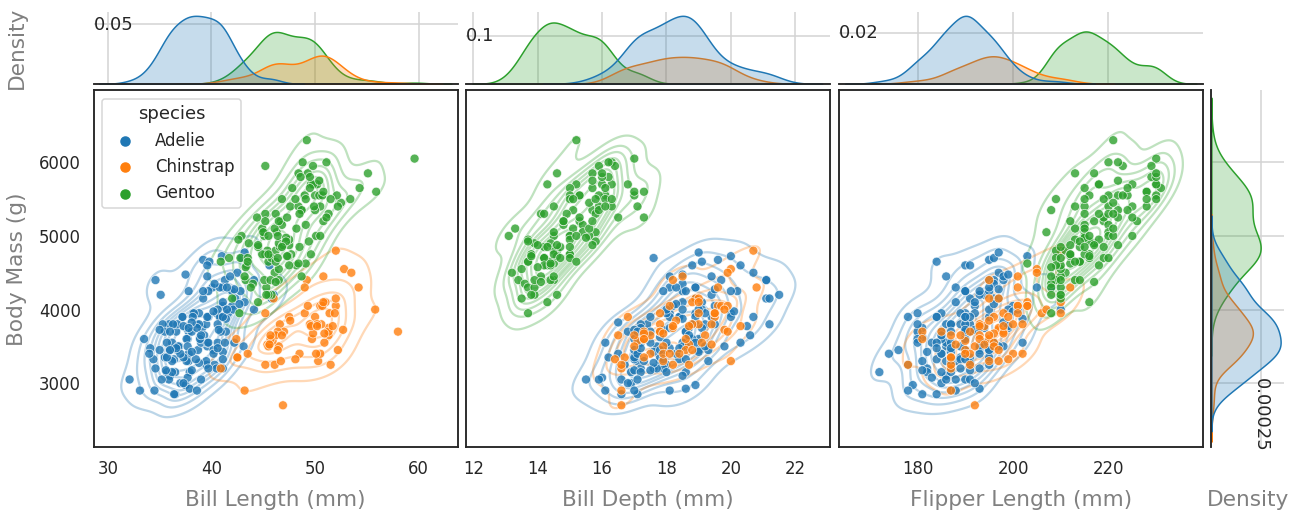

In [99]:
jointplots(["bill_length_mm", "bill_depth_mm", "flipper_length_mm"], "body_mass_g", penguins, hue="species", 
            height=8, ratio=5, space=0.03, 
            xlabels=["Bill Length (mm)", "Bill Depth (mm)", "Flipper Length (mm)"], ylabel="Body Mass (g)")


## 2.4. 결론

- seaborn의 jointplot을 가져다 쓰는 데 그치지 않았다.
- **matplotlib의 객체지향 방식을 이용해 seaborn의 한계를 벗어날 수 있었다.**


- 본 예제에서는 ```scatterplot```과 2차원 ```kdeplot```만 결합했다.
- 그러나 이 외에도 seaborn과 matplotlib이 제공하는 거의 모든 기능을 결합할 수 있다.
- 매뉴얼의 한계에 얽매이지 말고 상상력을 동원해 보면 더 멋지게 만들수 있을 것이다.

출처: https://jehyunlee.github.io/ 자료를 이용해 학습 했다.